In [2]:
!pip install mysql-connector-python

In [16]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="422123")

In [4]:
query = "SELECT * FROM banking_case.customers"

In [5]:
print(query)

SELECT * FROM banking_case.customers


In [5]:
df = pd.read_sql(query,cnx)

C:\Users\maajs\AppData\Local\Temp\ipykernel_10936\1565249183.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,cnx)


In [6]:
cnx.close()

In [7]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [8]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()


Shape of the DataFrame: (3000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card

In [9]:
df["Estimated Income"]

0        75384.77
1       289834.31
2       169935.23
3       356808.11
4       130711.68
          ...    
2995    297617.14
2996     42397.46
2997     48339.88
2998    107265.87
2999     56826.53
Name: Estimated Income, Length: 3000, dtype: float64

In [10]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest=True)

<Axes: xlabel='Income Band'>

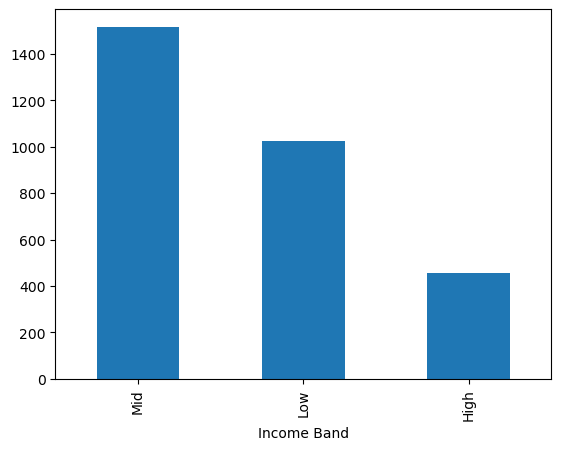

In [13]:
df['Income Band'].value_counts().plot(kind='bar')

In [14]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

# Univariate Analysis

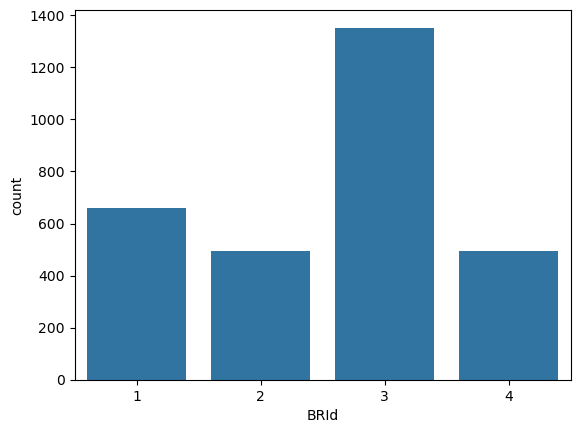

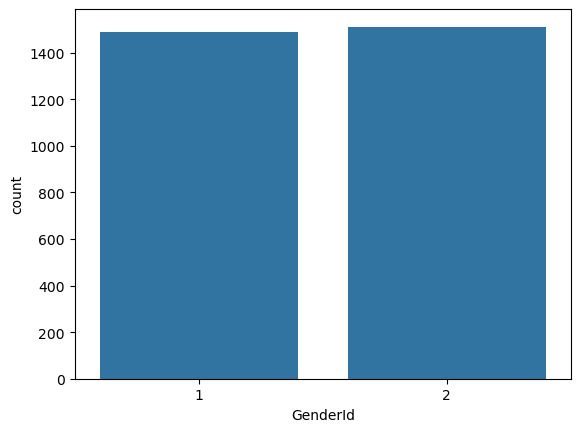

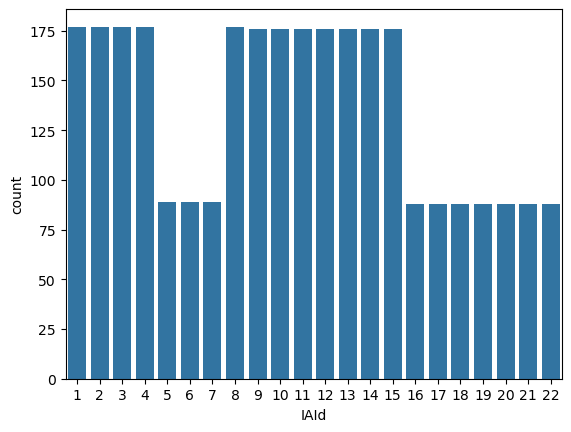

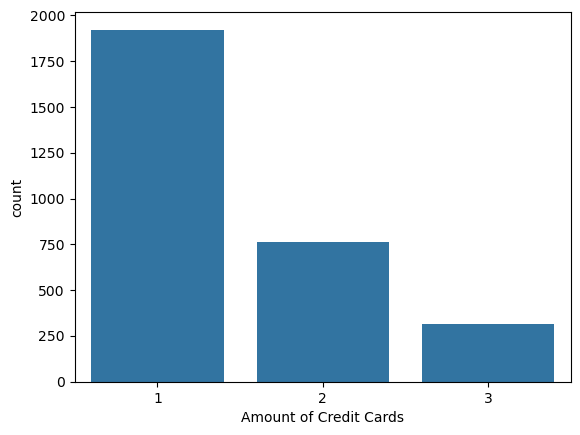

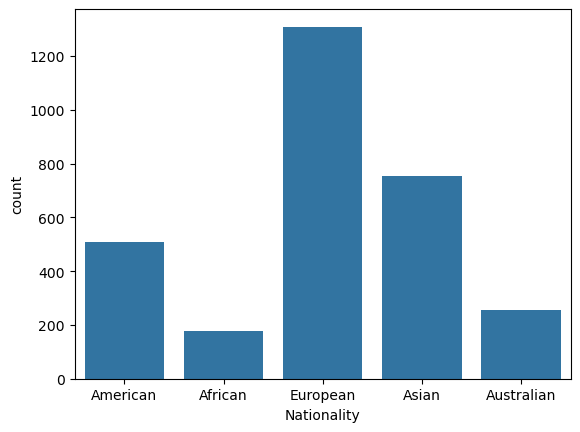

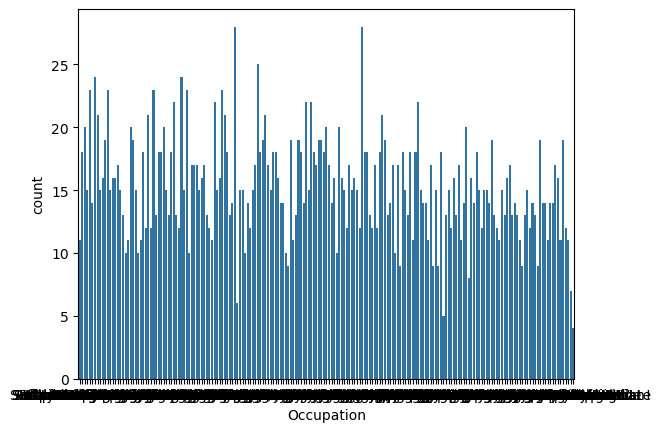

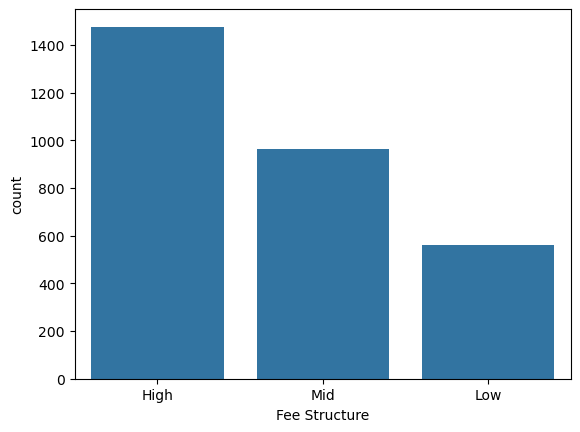

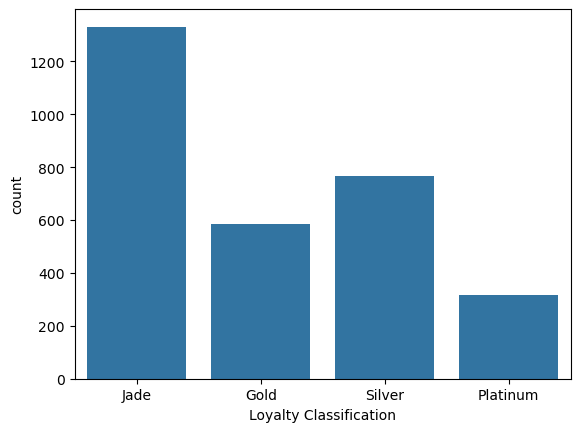

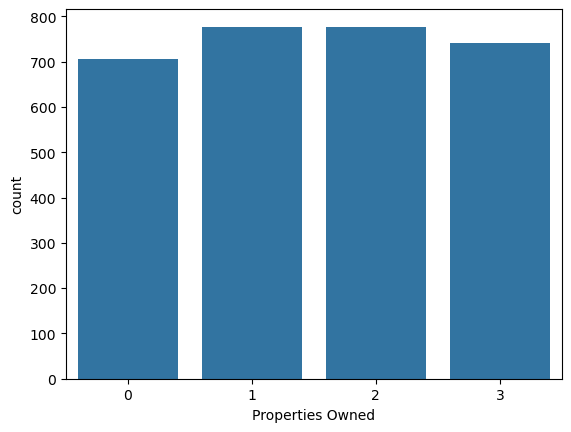

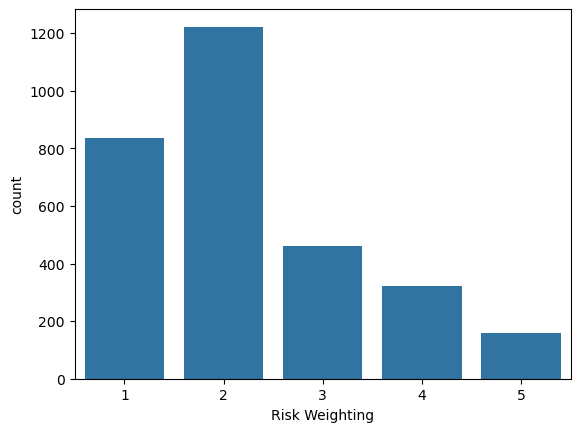

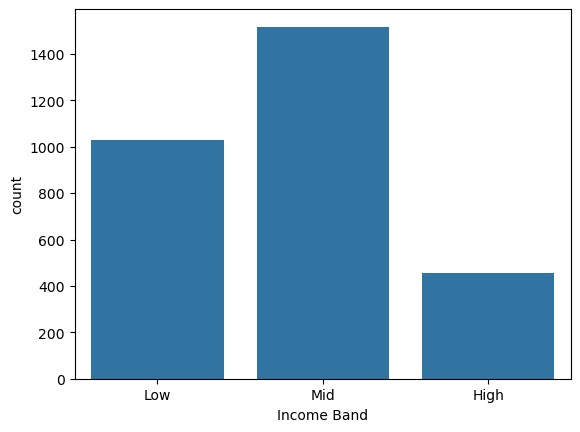

In [17]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

# Bivariate Analysis

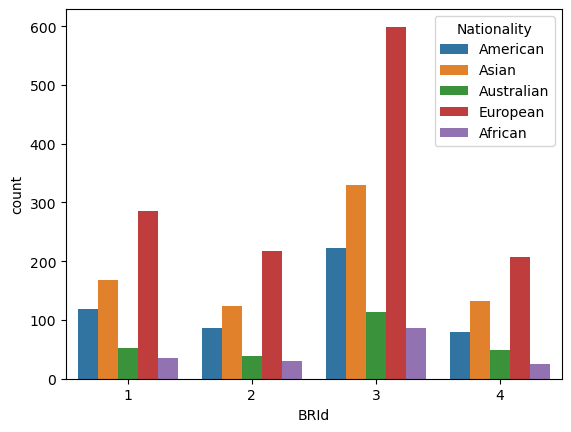

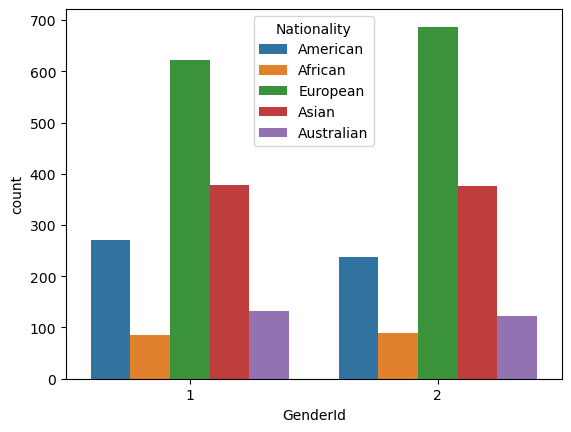

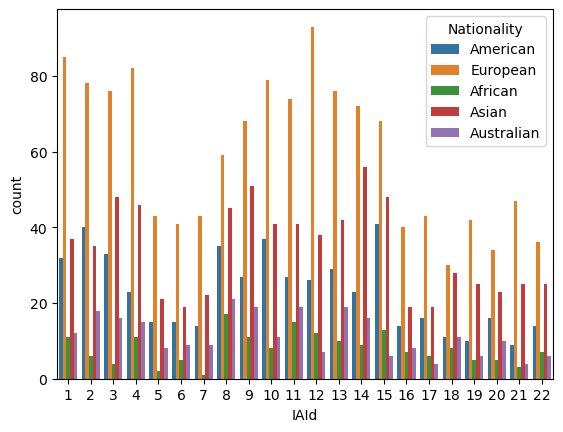

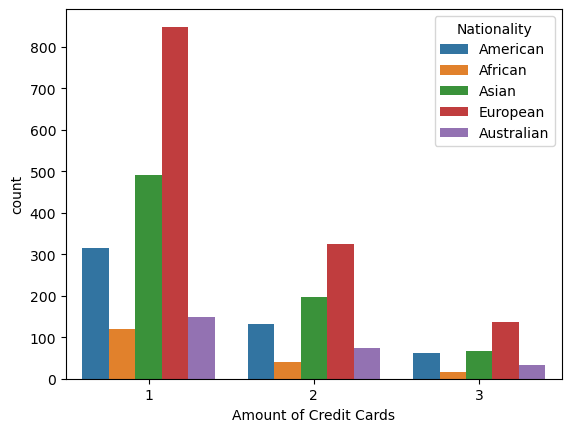

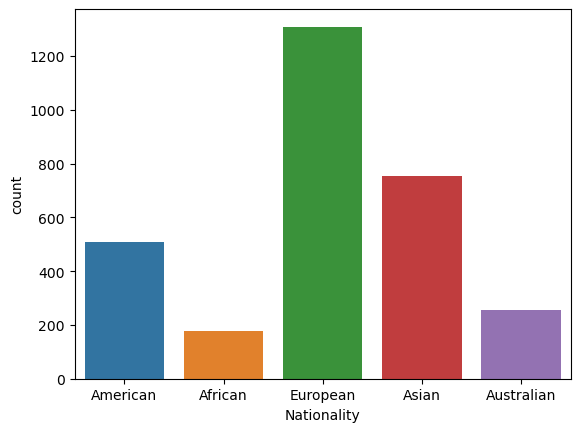

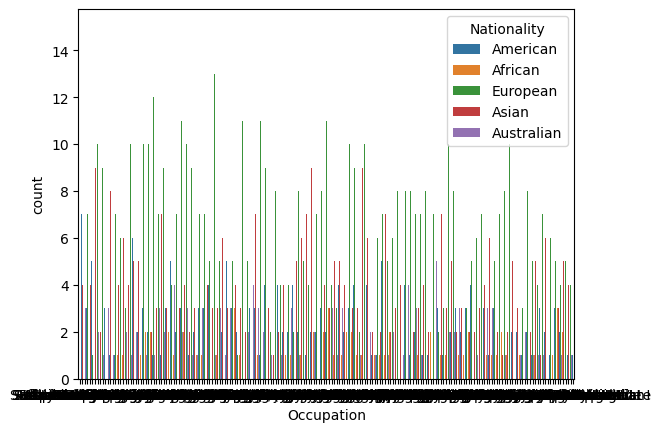

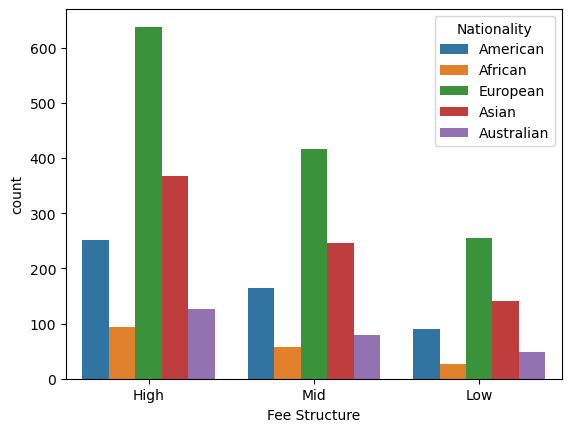

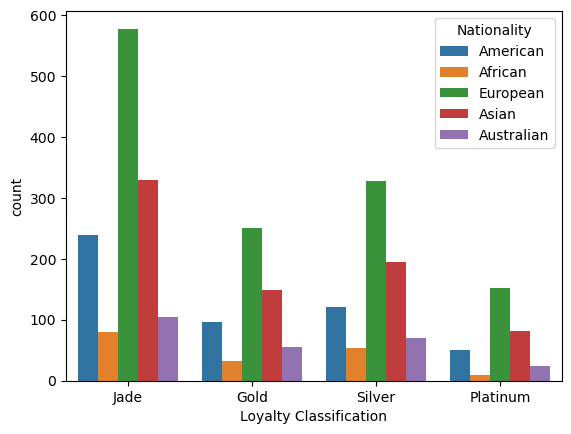

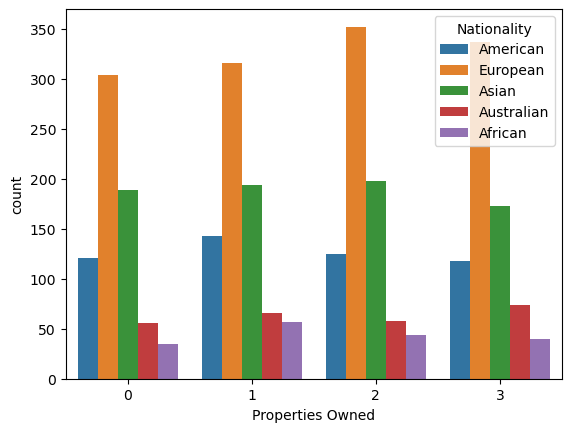

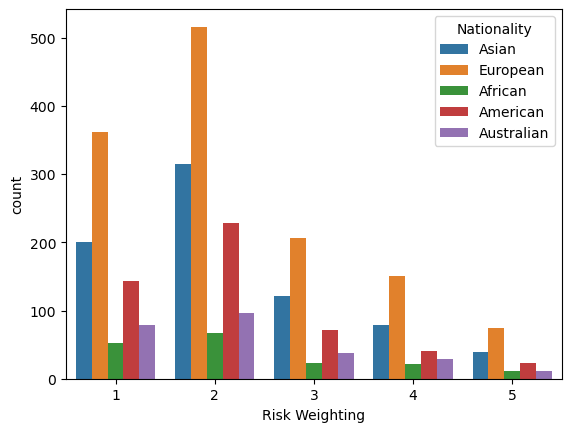

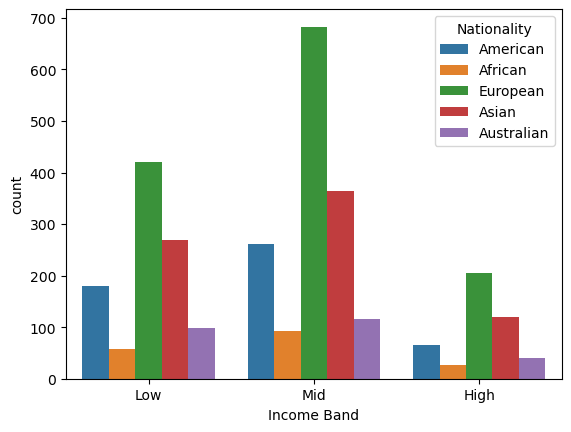

In [18]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

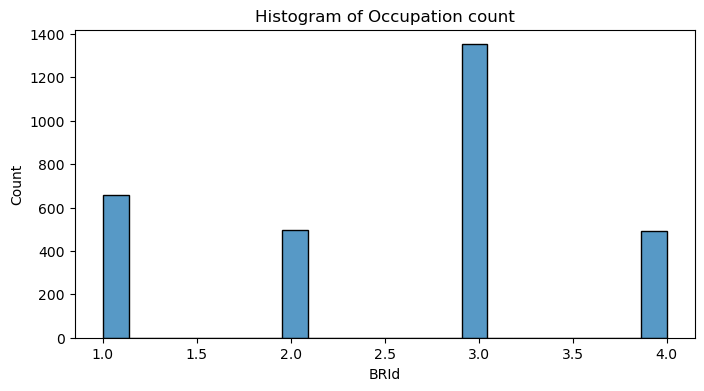

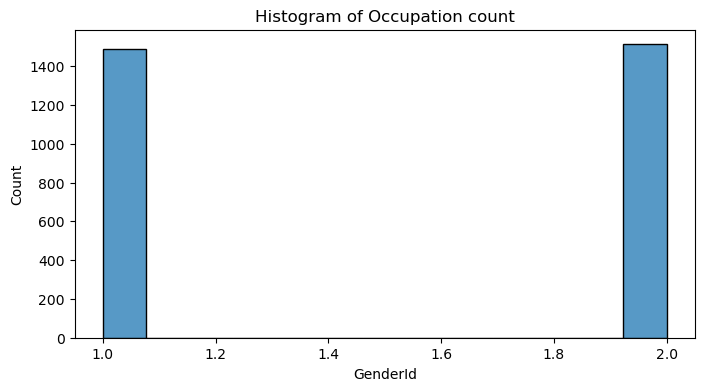

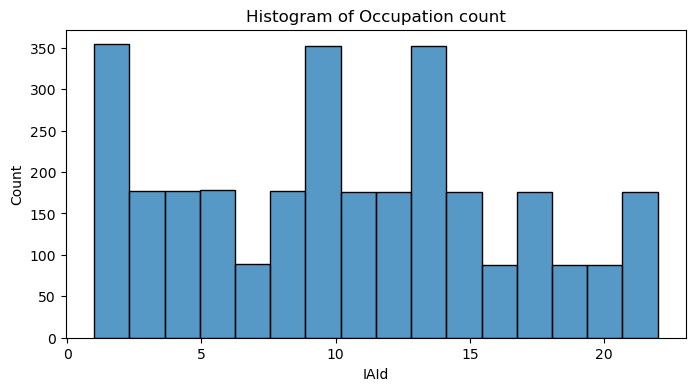

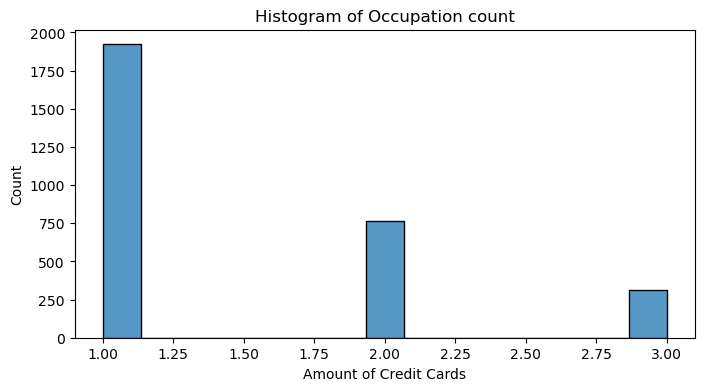

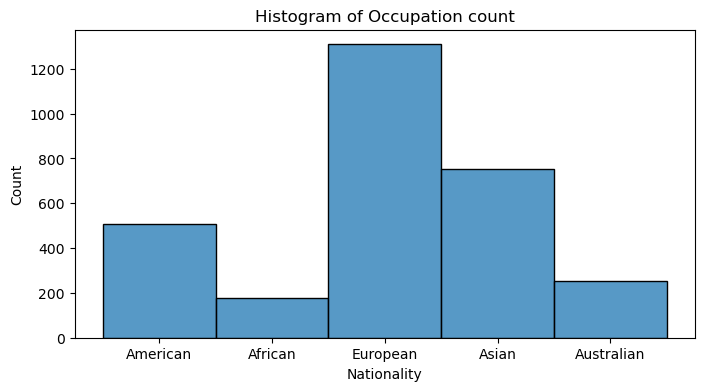

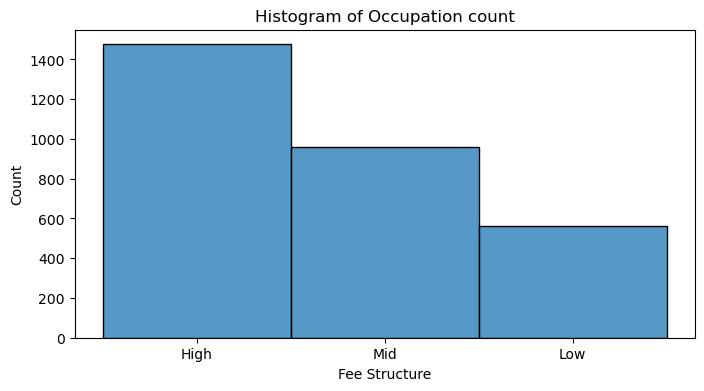

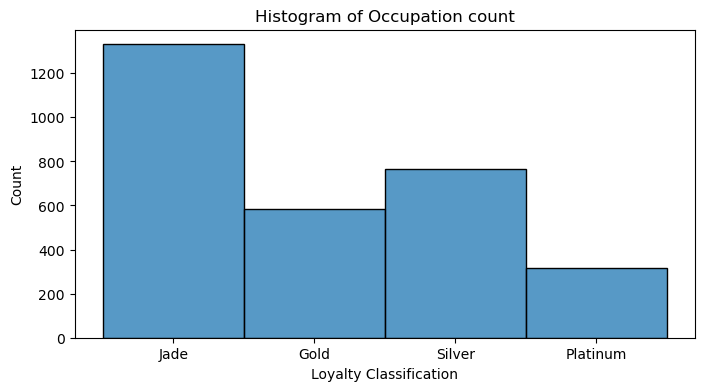

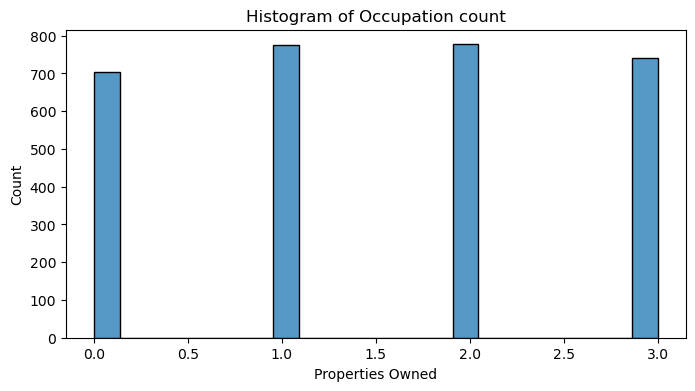

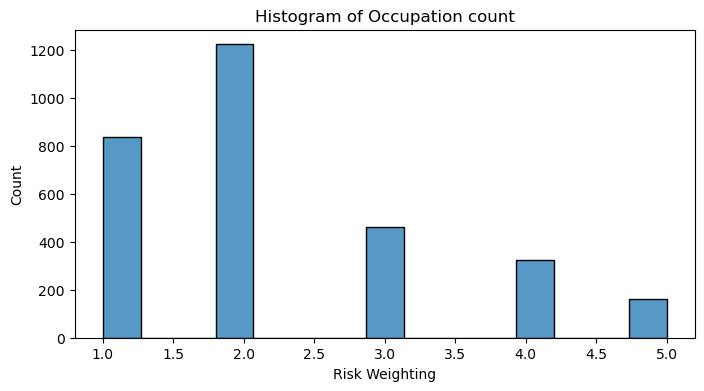

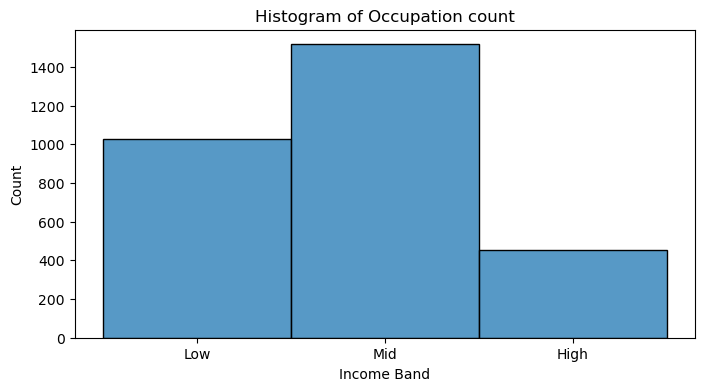

In [19]:
#Histplot of value counts for different occupation


for col in categorical_cols:
    if col == 'Occupation':
        continue
    plt.figure(figsize = (8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Numerical Analysis

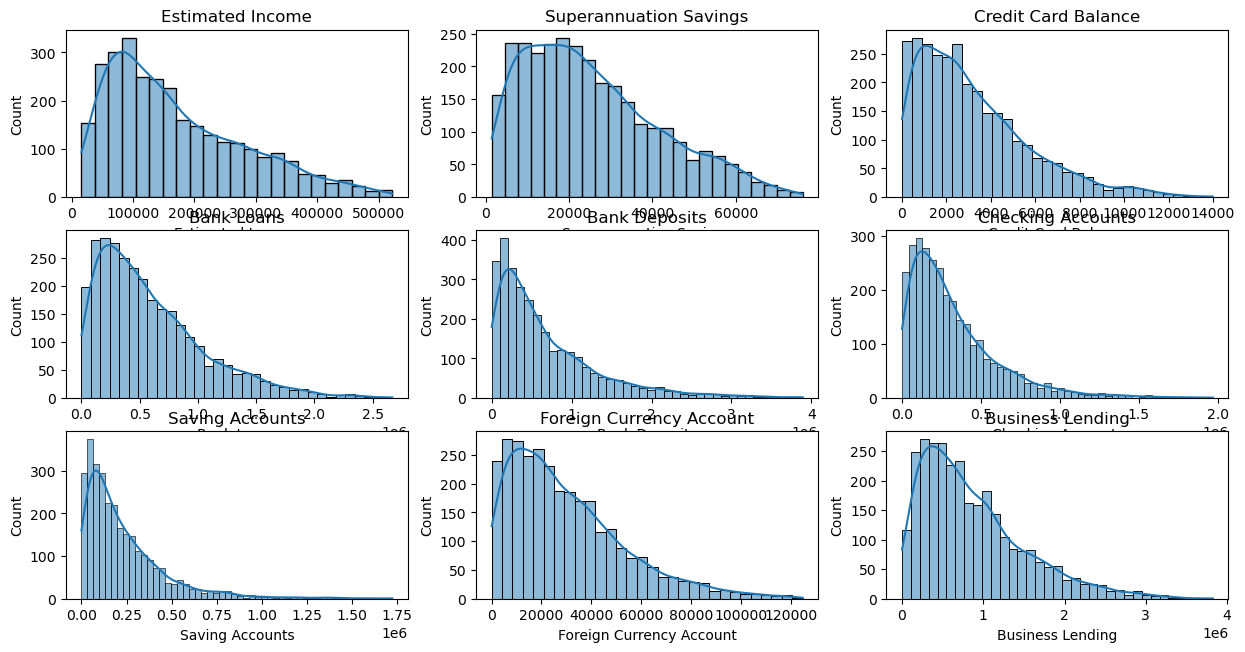

In [24]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']

#Univariate Analysis
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

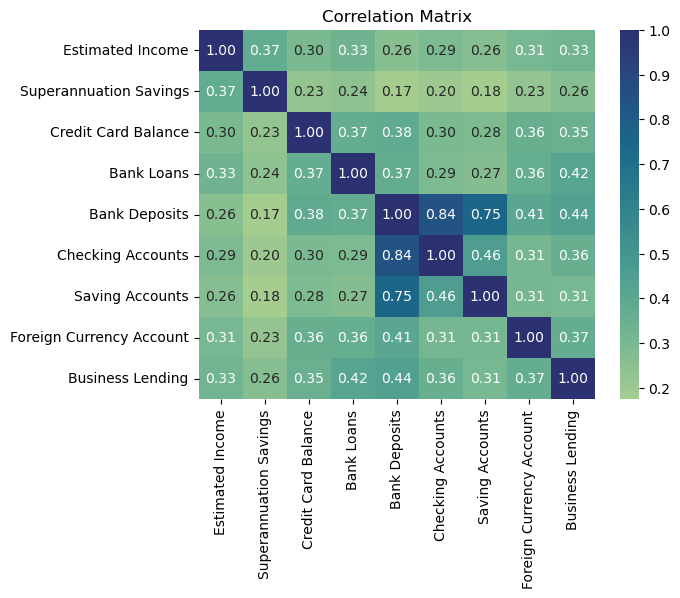

In [25]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figsize=(12,12)
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()